### Compare users detected for 2018 and 2019

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

working_dir = os.getenv("WORKING_DIR")
os.environ["USE_PYGEOS"] = "0"

from setup import *
from plotting import *
from preprocess import *

In [2]:
c = read_config(f"{working_dir}configs/config_2018.yml")
(
    year,
    datatypes,
    initial_cols,
    sel_cols,
    final_cols,
    minlon,
    maxlon,
    minlat,
    maxlat,
) = get_config_vars(c=c, mode="preprocess")
min_days, min_pings = get_config_vars(c=c, mode="user_qc")

where = get_dirs(working_dir, year=year, min_days=min_days, min_pings=min_pings)

In [3]:
where.user_stats_dir

'/Users/emilyrobitschek/git/ETH/SPUR/mobile_data_colombia/out/year=2018/user_stats/'

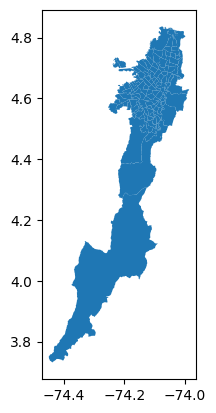

In [4]:
shapefile, gdf_regions = get_shp(
    meta_dir=where.meta_dir, shp_name=c["meta"]["shp"]["study_area"], load=True
)

### Look at users detected across 2018 and 2019

In [5]:
user_stats_2018_path = (
    f"../out/year=2018/user_stats/user_stats_year=2018_allpings_shp_filtered.csv"
)
user_stats_2019_path = (
    f"../out/year=2019/user_stats/user_stats_year=2019_allpings_shp_filtered.csv"
)
user_stats_2018 = pd.read_csv(user_stats_2018_path)
user_stats_2019 = pd.read_csv(user_stats_2019_path)


user_stats_2018_path_60 = f"../out/year=2018/user_stats/user_stats_year=2018_{min_pings}min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2019_path_60 = f"../out/year=2019/user_stats/user_stats_year=2019_{min_pings}min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2018_60 = pd.read_csv(user_stats_2018_path_60)
user_stats_2019_60 = pd.read_csv(user_stats_2019_path_60)

user_stats_2018_path_150 = f"../out/year=2018/user_stats/user_stats_year=2018_150min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2019_path_150 = f"../out/year=2019/user_stats/user_stats_year=2019_150min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2018_150 = pd.read_csv(user_stats_2018_path_150)
user_stats_2019_150 = pd.read_csv(user_stats_2019_path_150)

user_stats_2018_path_300 = f"../out/year=2018/user_stats/user_stats_year=2018_300min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2019_path_300 = f"../out/year=2019/user_stats/user_stats_year=2019_300min_pings_{min_days}min_days_shp_filtered.csv"
user_stats_2018_300 = pd.read_csv(user_stats_2018_path_300)
user_stats_2019_300 = pd.read_csv(user_stats_2019_path_300)

user_stats_2018.head()

,uid,min_day,max_day,pings,daysActive,daysSpanned,pingsPerDay,avg
0,000ce491-abdd-4819-81a6-1751faf50a81,2018-10-28 00:00:00-05:00,2018-11-15 00:00:00-05:00,8,4,18,"[2, 4, 1, 1]",2.000000
1,0012b013-dfa4-424c-a4ad-ad94deeff930,2018-07-18 00:00:00-05:00,2018-08-10 00:00:00-05:00,126,16,23,"[4, 2, 4, 1, 30, 2, 9, 7, 4, 10, 8, 9, 9, 5, 9...",7.875000
2,001ba901-8ae0-4314-b812-fb67ce07e604,2018-11-27 00:00:00-05:00,2018-12-21 00:00:00-05:00,7,3,24,"[5, 1, 1]",2.333333
3,001db551-211c-4cd0-bc64-e9fe4cdd4fa6,2018-11-07 00:00:00-05:00,2018-11-07 00:00:00-05:00,7,1,1,[7],7.000000
4,0025294C-2DE2-47FB-BD8D-9B647223989A,2018-07-05 00:00:00-05:00,2018-12-27 00:00:00-05:00,1357,85,175,"[4, 1, 2, 4, 1, 92, 6, 1, 44, 1, 8, 5, 92, 9, ...",15.964706


In [14]:
def find_common_uids_with_counts(df1, df2, suffixes=("_x", "_y")):
    """Create a Dataframe with common UIDs shared across two dataframes and calculate number of uids that appear in both"""
    # Merge the dataframes on 'uid'
    merged_df = pd.merge(df1, df2, on="uid", suffixes=suffixes)

    # Calculate the percentage of shared 'uid's
    unique_uids_df1 = set(list(df1["uid"]))
    unique_uids_df2 = set(list(df2["uid"]))
    unique_shared_uids = set(list(merged_df["uid"]))

    percentage_shared_df1 = (
        len(unique_uids_df1.intersection(unique_shared_uids))
        / len(unique_uids_df1)
        * 100
    )
    percentage_shared_df2 = (
        len(unique_uids_df2.intersection(unique_shared_uids))
        / len(unique_uids_df2)
        * 100
    )

    percentage_shared = len(merged_df) / (len(df1) + len(df2)) * 100
    print(
        f"The number of unique users in df1, df2 were {len(unique_uids_df1)}, {len(unique_uids_df2)} respectively."
    )
    print(
        f"The number of unique users shared between the two dataframes was {len(unique_shared_uids)}."
    )
    print(
        f"The percentage of unique users shared between the two dataframes was {percentage_shared:.2f}%."
    )

    return merged_df

In [15]:
uids_in_both = find_common_uids_with_counts(
    user_stats_2018, user_stats_2019, suffixes=("_2018", "_2019")
)
uids_in_both60 = find_common_uids_with_counts(
    user_stats_2018_60, user_stats_2019_60, suffixes=("_2018", "_2019")
)
uids_in_both150 = find_common_uids_with_counts(
    user_stats_2018_150, user_stats_2019_150, suffixes=("_2018", "_2019")
)
uids_in_both300 = find_common_uids_with_counts(
    user_stats_2018_300, user_stats_2019_300, suffixes=("_2018", "_2019")
)

uids_in_both

The number of unique users in df1, df2 were 2650805, 3557494 respectively.
The number of unique users shared between the two dataframes was 573186.
The percentage of unique users shared between the two dataframes was 9.23%.
The number of unique users in df1, df2 were 364612, 701961 respectively.
The number of unique users shared between the two dataframes was 65725.
The percentage of unique users shared between the two dataframes was 6.16%.
The number of unique users in df1, df2 were 238463, 539392 respectively.
The number of unique users shared between the two dataframes was 38743.
The percentage of unique users shared between the two dataframes was 4.98%.
The number of unique users in df1, df2 were 158095, 395668 respectively.
The number of unique users shared between the two dataframes was 22351.
The percentage of unique users shared between the two dataframes was 4.04%.


,uid,min_day_2018,max_day_2018,pings_2018,daysActive_2018,daysSpanned_2018,pingsPerDay_2018,avg_2018,min_day_2019,max_day_2019,pings_2019,daysActive_2019,daysSpanned_2019,pingsPerDay_2019,avg_2019
0,0012b013-dfa4-424c-a4ad-ad94deeff930,2018-07-18 00:00:00-05:00,2018-08-10 00:00:00-05:00,126,16,23,"[4, 2, 4, 1, 30, 2, 9, 7, 4, 10, 8, 9, 9, 5, 9...",7.875000,2019-06-22 00:00:00-05:00,2019-06-22 00:00:00-05:00,6,1,1,[6],6.000000
1,001ba901-8ae0-4314-b812-fb67ce07e604,2018-11-27 00:00:00-05:00,2018-12-21 00:00:00-05:00,7,3,24,"[5, 1, 1]",2.333333,2019-01-30 00:00:00-05:00,2019-08-30 00:00:00-05:00,2519,102,212,"[5, 6, 206, 6, 2, 10, 4, 1, 2, 3, 31, 8, 27, 2...",24.696078
2,001db551-211c-4cd0-bc64-e9fe4cdd4fa6,2018-11-07 00:00:00-05:00,2018-11-07 00:00:00-05:00,7,1,1,[7],7.000000,2019-07-19 00:00:00-05:00,2019-07-20 00:00:00-05:00,4,2,1,"[3, 1]",2.000000
3,0045e2df-a92a-45c5-bc05-74b283d6f107,2018-07-15 00:00:00-05:00,2018-11-12 00:00:00-05:00,10,6,120,"[2, 1, 1, 3, 1, 2]",1.666667,2019-01-23 00:00:00-05:00,2019-01-23 00:00:00-05:00,1,1,1,[1],1.000000
4,00507103-f55d-4254-87bc-9d39da4266cb,2018-11-28 00:00:00-05:00,2018-11-28 00:00:00-05:00,2,1,1,[2],2.000000,2019-07-23 00:00:00-05:00,2019-08-22 00:00:00-05:00,6,3,30,"[2, 2, 2]",2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573181,ffc3007f-3a61-4ed2-866b-aa312ac37bbf,2018-11-26 00:00:00-05:00,2018-11-26 00:00:00-05:00,4,1,1,[4],4.000000,2019-01-10 00:00:00-05:00,2019-06-01 00:00:00-05:00,5,2,142,"[3, 2]",2.500000
573182,ffcaed90-ef5c-4759-a201-bf26e2c2aee9,2018-09-15 00:00:00-05:00,2018-09-15 00:00:00-05:00,3,1,1,[3],3.000000,2019-05-01 00:00:00-05:00,2019-06-29 00:00:00-05:00,466,32,59,"[25, 36, 11, 12, 27, 2, 8, 28, 40, 27, 38, 19,...",14.562500
573183,ffcec29b-5dbe-4e53-9a50-ca6d32aba94e,2018-09-04 00:00:00-05:00,2018-09-04 00:00:00-05:00,1,1,1,[1],1.000000,2019-03-30 00:00:00-05:00,2019-08-18 00:00:00-05:00,37,29,141,"[1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, ...",1.275862
573184,fff26f31-64b8-4122-9361-9b5babb4b8b1,2018-10-04 00:00:00-05:00,2018-10-04 00:00:00-05:00,1,1,1,[1],1.000000,2019-04-01 00:00:00-05:00,2019-04-20 00:00:00-05:00,36,7,19,"[1, 2, 6, 1, 2, 23, 1]",5.142857


### Write out these shared stats to a folder
Use the stats for downstream filtering

In [16]:
import os

write_dir = os.path.join(c["run"]["working_dir"], c["run"]["user_stats_dir_both_years"])
write_dir

'/Users/emilyrobitschek/git/ETH/SPUR/mobile_data_colombia/./out/all_years/user_stats/'

In [20]:
uids_in_both.to_csv(
    os.path.join(
        write_dir, "user_stats_common_users_2018_2019_allpings_shp_filtered.csv"
    ),
    index=False,
)

min_pings = 60
uids_in_both60.to_csv(
    os.path.join(
        write_dir,
        f"user_stats_common_users_2018_2019_minpings{min_pings}_mindays{min_days}_shp_filtered.csv",
    ),
    index=False,
)
min_pings = 150
uids_in_both150.to_csv(
    os.path.join(
        write_dir,
        f"user_stats_common_users_2018_2019_minpings{min_pings}_mindays{min_days}_shp_filtered.csv",
    ),
    index=False,
)

min_pings = 300
uids_in_both300.to_csv(
    os.path.join(
        write_dir,
        f"user_stats_common_users_2018_2019_minpings{min_pings}_mindays{min_days}_shp_filtered.csv",
    ),
    index=False,
)